# Bayesian Decisions

PART 1 - Code Mean, Standard Deviation, Sample Mean and Covariance from scratch for util.py file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from util import mean
from util import stdev
from util import sampleMean
from util import covariance
from classifiers import Prior

Mean

In [2]:
np_array = np.random.normal(loc=0,scale = 1, size = 1000)
calculated_mean = mean(np_array)
print("Calculated mean is",calculated_mean)
numpy_mean = np.mean(np_array)
print("NumPy mean is", numpy_mean)

Calculated mean is -0.013435652577778893
NumPy mean is -0.013435652577778878


Standard Deviation

In [3]:
calculated_stdev = stdev(np_array)
print("Calculated standard deviation is", calculated_stdev)
numpy_stdev = np.std(np_array)
print("NumPy standard deviation is", numpy_stdev)

Calculated standard deviation is 1.0020129706789993
NumPy standard deviation is 1.0020129706789993


Sample Mean

In [4]:
np_array = np.random.normal(loc=0, scale=1, size=(100, 3))
calculated_sampleMean = sampleMean(np_array)
print("Calculated sample mean is", calculated_sampleMean)
numpy_sampleMean = np.mean(np_array, axis=0)
print("NumPy sample mean is", numpy_sampleMean)

Calculated sample mean is [-0.07624373367424138, 0.08060099328919337, -0.05841859120556757]
NumPy sample mean is [-0.07624373  0.08060099 -0.05841859]


Covariance

In [5]:
np.random.seed(42)
sample_data = np.random.normal(loc=[10, 20], scale=[2, 5], size=(100, 2))
np_array = sample_data.tolist()
calculated_covariance = covariance(np_array)
print("Calculated Covariance is",calculated_covariance)
numpy_covariance = np.cov(sample_data, rowvar=False)
print("Numpy Covariance is",numpy_covariance)

Calculated Covariance is [[2.933089260363884, 0.2764620671520756], [0.2764620671520756, 24.94296043123498]]
Numpy Covariance is [[ 2.93308926  0.27646207]
 [ 0.27646207 24.94296043]]


PART 2

In [6]:
np.random.seed(42)
total = 1000
stress_count = 430

stress = np.random.normal(loc=110, scale=10, size=stress_count)
not_stress = np.random.normal(loc=65, scale=5, size=total - stress_count)

data = np.concatenate([stress, not_stress])

df = pd.DataFrame({
    'Heart-Rate': data,
    'Class': ['Stress'] * stress_count + ['Not Stress'] * (total - stress_count)
})

description = df.groupby('Class')['Heart-Rate'].describe()
print("DataFrame Description:", description)

DataFrame Description:             count        mean       std        min         25%         50%  \
Class                                                                        
Not Stress  570.0   65.047852  4.954347  51.515567   61.811741   64.939011   
Stress      430.0  110.322719  9.645487  77.587327  103.471030  110.658993   

                   75%         max  
Class                               
Not Stress   68.223969   80.394404  
Stress      116.504656  148.527315  


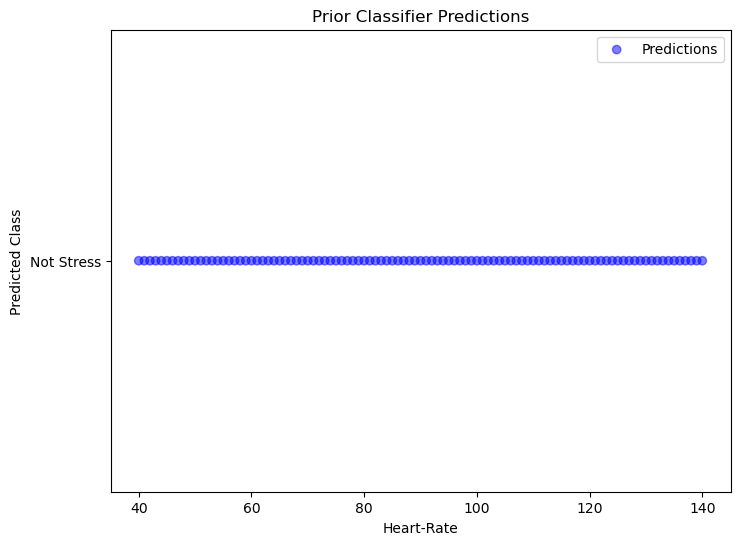

In [8]:
prior_class = Prior()
prior_class.fit(df['Heart-Rate'].values, df['Class'].values)
testing_range = np.arange(40, 141, 1)
pred = prior_class.predict(testing_range)


plt.figure(figsize=(8, 6))
color_map = {'Stress': 'red', 'Not Stress': 'blue'}
colors = [color_map[p] for p in pred]
plt.scatter(testing_range, pred, c=colors, marker='o', label='Predictions', alpha=0.5)
plt.xlabel('Heart-Rate')
plt.ylabel('Predicted Class')
plt.title('Prior Classifier Predictions')
plt.legend()
plt.show()
